<a href="https://colab.research.google.com/github/ericmuckley/code/blob/master/microscopy_orientation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of microscopy images

author: ericmuckley@gmail.com

## Install and import libraries

First install ***ncem***, a package for electron microscopy analysis
supported by the National Center for Electron Microscopy at the
Molecular Foundry. Code is avilable here:
https://github.com/ercius/openNCEM

In [1]:
!pip install ncempy

import numpy as np
from glob import glob
from time import time
from ncempy.io import dm
import matplotlib.pyplot as plt

## Import all the images from Github

In [2]:
# clone the entire github repository where the data file is located
%cd /content/
!rm -rf cloned-data
!git clone -l -s git://github.com/ericmuckley/datasets.git cloned-data
# navigate to the repo
%cd cloned-data/2020-01-24_CeO2ZnO2_on_graphene/

# set path of folder which contains image files
folder_path = "/content/cloned-data/2020-01-24_CeO2ZnO2_on_graphene/*.*"
files = glob(folder_path)
print('\n-----------------------------\nFound {} files:'.format(len(files)))
for f in files:
    print(f.split('/')[-1])

/content
Cloning into 'cloned-data'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 214 (delta 1), reused 4 (delta 1), pack-reused 209
Receiving objects: 100% (214/214), 233.83 MiB | 31.46 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Checking out files: 100% (52/52), done.
/content/cloned-data/2020-01-24_CeO2ZnO2_on_graphene

-----------------------------
Found 38 files:
3-Analog.dm3
3-CW-16.5%10s.dm3
2-CW19%.dm3
3-CW-17.5%10s.dm3
1-CW_10%_1s.dm3
3-EELS_Spectrum_Image.dm3
1-400K_as_dep-b.dm3
1-CW_10%_1s-c.dm3
3-SAED_after_18%.dm3
3-CW-18%10s.dm3
2-CW18%.dm3
2-CW19%-2.dm3
3-spot_EELS-2.dm3
3-CW-16%10s.dm3
2-cw17%.dm3
1-CW_10%_1s-b.dm3
2-pristine.dm3
3-spot_HAADF.dm3
1-400K_as_dep-c.dm3
3-CW15%.dm3
1-CW_10%_1s-SAED.dm3
1-400K_as_dep.dm3
1-as_dep_31.5K.dm3
3-scanning_EELS_Acquire.dm3
3-CW-18%5s.dm3
3-CW-17.5%20s.dm3
3-pristie.dm3
3-CW-17.5%140s.dm3
3-spot_EELS.dm3
3-SI_Survey_Image.dm3


## Define some functions

In [0]:
# change matplotlib settings to make plots look nicer
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['ytick.major.width'] = 3


def plot_setup(labels=['X', 'Y'], fsize=18, setlimits=False, limits=[0,1,0,1],
               title='', legend=False, save=False, filename='plot.jpg'):
    """Creates a custom plot configuration to make graphs look nice.
    This can be called with matplotlib for setting axes labels,
    titles, axes ranges, and the font size of plot labels.
    This should be called between plt.plot() and plt.show() commands."""
    plt.xlabel(str(labels[0]), fontsize=fsize)
    plt.ylabel(str(labels[1]), fontsize=fsize)
    plt.title(title, fontsize=fsize)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    if legend:
        plt.legend(fontsize=fsize-4)
    if setlimits:
        plt.xlim((limits[0], limits[1]))
        plt.ylim((limits[2], limits[3]))
    if save:
        fig.savefig(filename, dpi=120, bbox_inches='tight')
        plt.tight_layout()


def get_physical_image_size(data):
    """Get the physcial size of the image, using the dictionary of image
    data as an input."""
    nm_per_x_pixel, nm_per_y_pixel = data['pixelSize']
    x_span = nm_per_x_pixel*len(data['data'][0])
    y_span = nm_per_y_pixel*len(data['data'])
    return (x_span, y_span), nm_per_x_pixel


def scale_array(arr, lim=(0, 1)):
    """Scale values of an array inside new limits."""
    scale = lim[1] - lim[0]
    arr_scaled = scale*(arr-np.min(arr))/(np.max(arr)-np.min(arr))+lim[0]
    return arr_scaled


def get_window_grid(data, window_len):
    """Get a grid of pixel coordinates at which to position a sliding
    window across the entire image."""
    x_steps = np.arange(0, len(data['data'][0])-window_len, window_len)
    y_steps = np.arange(0, len(data['data'])-window_len, window_len)
    grid = np.array(np.meshgrid(x_steps, y_steps)).T.reshape(-1,2)
    return grid


def get_gradient(arr):
    """Get 2D gradient of 2D array."""
    grad_y, grad_x = np.gradient(arr)
    grad = {'x': grad_x,
            'y': grad_y,
            'xabs': np.abs(grad_x),
            'yabs': np.abs(grad_y),
            'med_xabs': np.median(np.abs(grad_x)),
            'med_yabs': np.median(np.abs(grad_y)),
            'max': np.max([np.abs(grad_x), np.abs(grad_y)]),
            'min': np.min([np.abs(grad_x), np.abs(grad_y)]),
            'x-y': np.median(np.abs(grad_x))-np.median(np.abs(grad_y))}
    return grad

## Loop over each image and perform analysis


------------------------------
File: 3-CW-16.5%10s


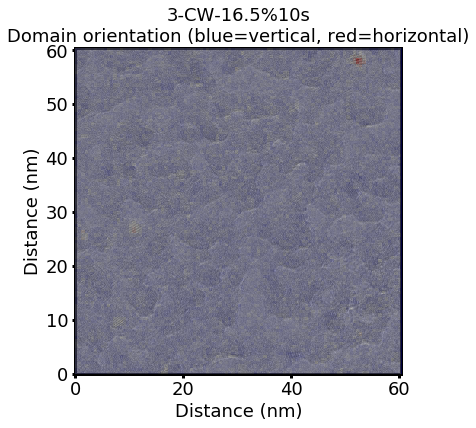

image runtime: 4 s
total runtime: 4 s

------------------------------
File: 2-CW19%


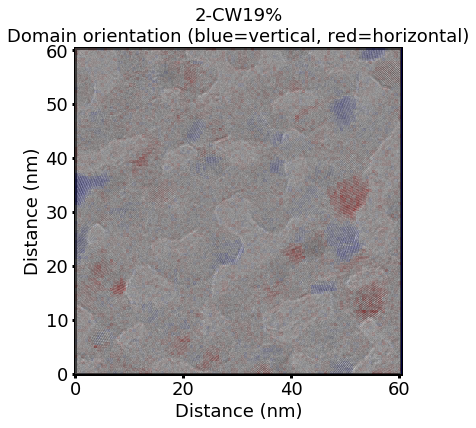

image runtime: 4 s
total runtime: 8 s

------------------------------
File: 3-CW-17.5%10s


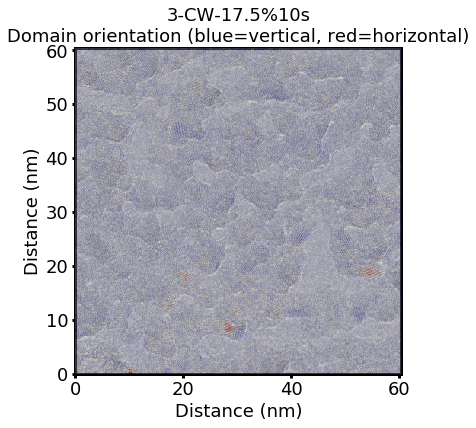

image runtime: 4 s
total runtime: 12 s

------------------------------
File: 1-CW_10%_1s


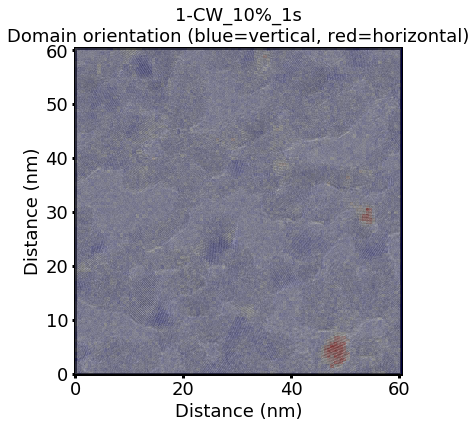

image runtime: 4 s
total runtime: 15 s

------------------------------
File: 1-CW_10%_1s-c


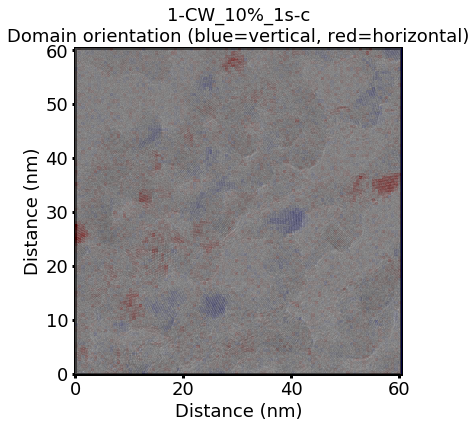

image runtime: 4 s
total runtime: 19 s

------------------------------
File: 3-CW-18%10s


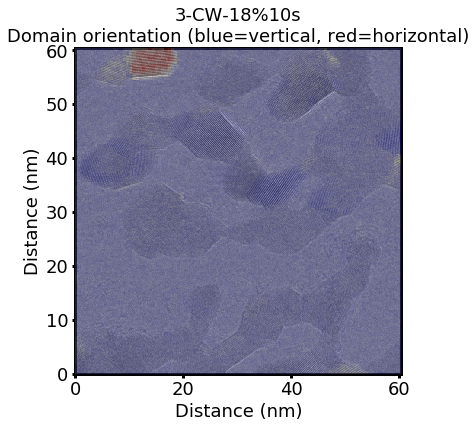

image runtime: 4 s
total runtime: 23 s

------------------------------
File: 2-CW18%


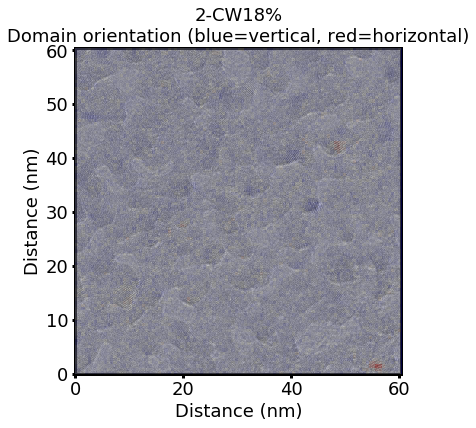

image runtime: 4 s
total runtime: 27 s

------------------------------
File: 2-CW19%-2


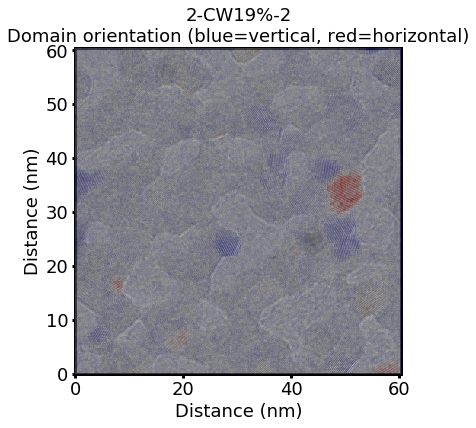

image runtime: 4 s
total runtime: 31 s

------------------------------
File: 3-CW-16%10s


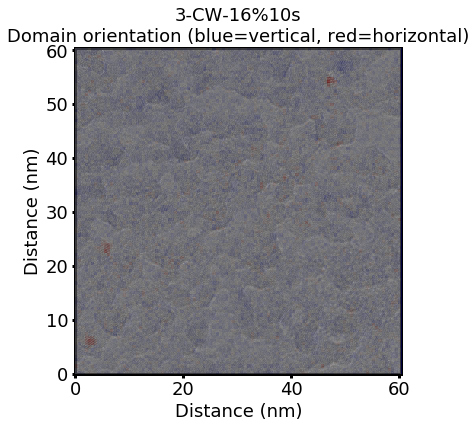

image runtime: 4 s
total runtime: 35 s

------------------------------
File: 2-cw17%


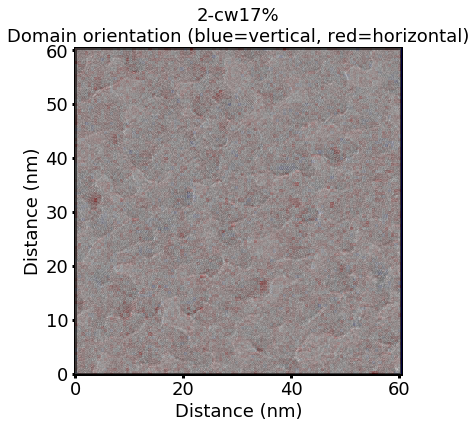

image runtime: 4 s
total runtime: 38 s

------------------------------
File: 1-CW_10%_1s-b


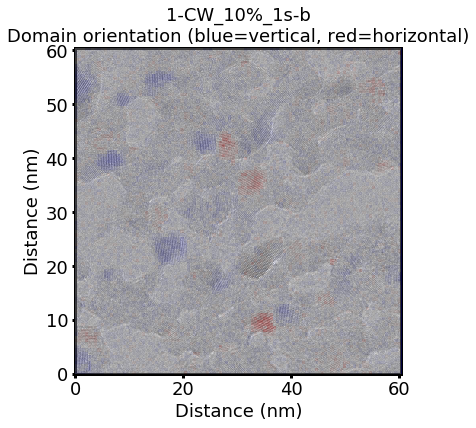

image runtime: 4 s
total runtime: 42 s

------------------------------
File: 3-CW15%


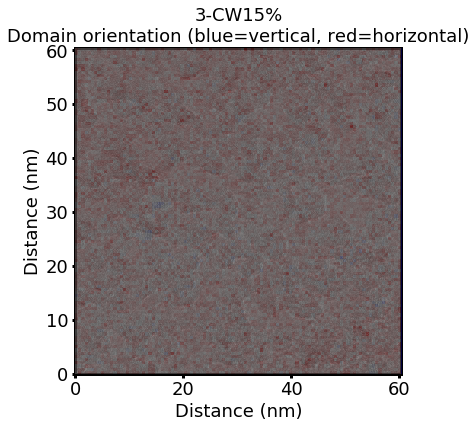

image runtime: 4 s
total runtime: 46 s

------------------------------
File: 3-CW-18%5s


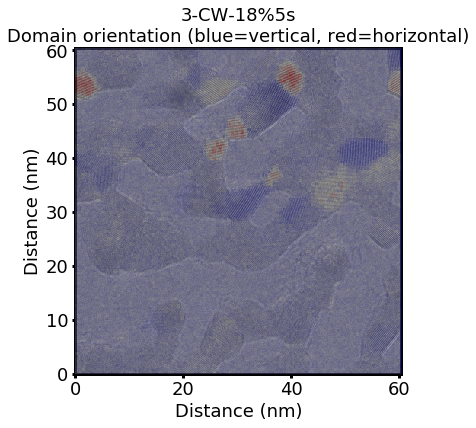

image runtime: 4 s
total runtime: 50 s

------------------------------
File: 3-CW-17.5%20s


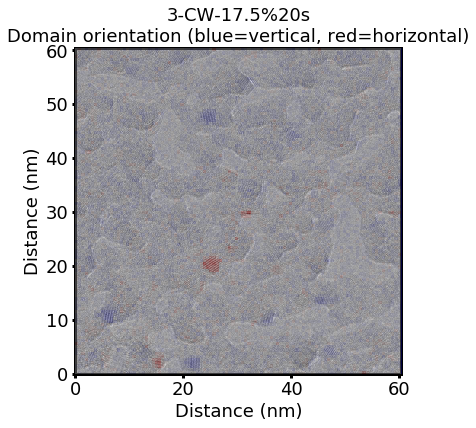

image runtime: 4 s
total runtime: 54 s

------------------------------
File: 3-CW-17.5%140s


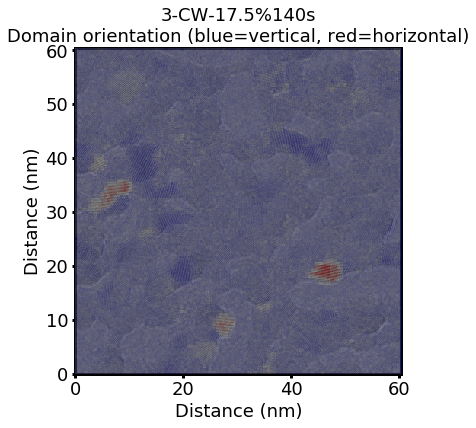

image runtime: 4 s
total runtime: 58 s

------------------------------
File: 3-CW-17.5%80s


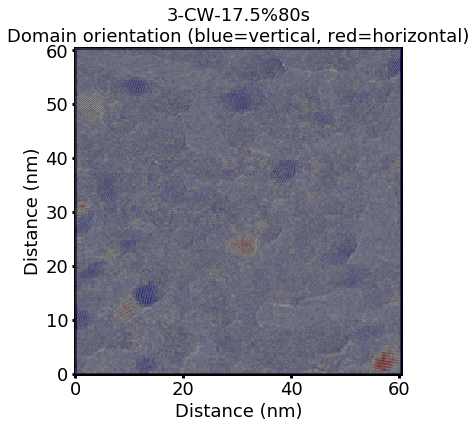

image runtime: 4 s
total runtime: 62 s

------------------------------
File: 3-CW-17%10s


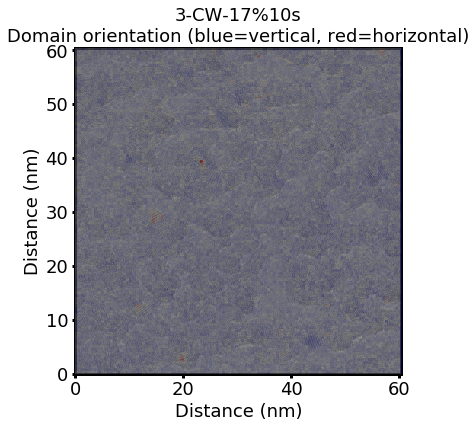

image runtime: 4 s
total runtime: 66 s

------------------------------
File: 3-CW-17.5%260s


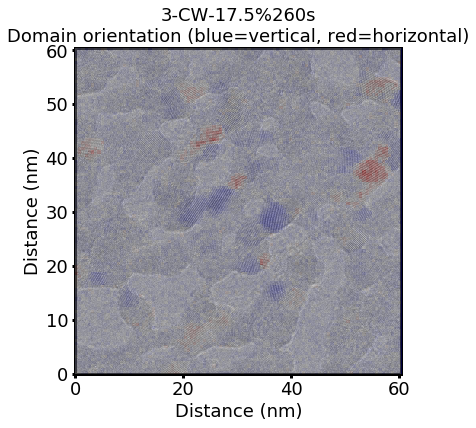

image runtime: 4 s
total runtime: 70 s

------------------------------
File: 3-CW-15%3s


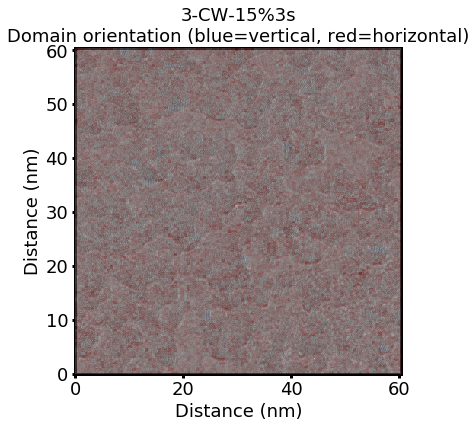

image runtime: 4 s
total runtime: 73 s


In [4]:
# get list of image files to examine
images = [f for f in files if 'CW' in f.upper() and 'SAED' not in f.upper()]

# set sliding window length in pixels
win_len = 20


# start timer to measure analysis time
script_start_time = time()

# loop over each image
for filename in images:#[1:2]:
    
    image_start_time = time()

    # read file
    image_label = filename.split('/')[-1].split('.dm3')[0]
    print('\n------------------------------\nFile: {}'.format(image_label))
    data = dm.dmReader(filename)
    img_span, nm_per_pixel = get_physical_image_size(data)
    grid = get_window_grid(data, win_len)
    
    # intialize empty maps to hold domain orientation information
    x_map = np.zeros_like(data['data']).astype(float)
    y_map = np.zeros_like(data['data']).astype(float)
    result_map = np.zeros_like(data['data']).astype(float)
    
    # plot image
    '''
    plt.imshow(data['data'], zorder=1,
               origin='lower', cmap='gray',
               extent=[0, img_span[0], 0, img_span[1]])
    plot_setup(title=image_label, labels=['Distance (nm)', 'Distance (nm)'])
    plt.show()
    '''
    '''
    # plot window square
    plt.gca().add_patch(
            Rectangle((nm_per_pixel*x0, nm_per_pixel*y0),
            nm_per_pixel*win_len, nm_per_pixel*win_len,
            linewidth=1, 
            edgecolor='white',
            facecolor='none', zorder=5))
    plot_setup(
            title=image_label,
            labels=['Distance (nm)', 'Distance (nm)'])
    '''
    
    # loop sliding window over entire image
    for cord_i, cord in enumerate(grid):
        # get window area
        x0, y0 = (cord)
        img0 = scale_array(data['data'][y0:y0+win_len, x0:x0+win_len])
        
        # get 2D gradient statistics of window area
        grad = get_gradient(img0)
        result_map[y0:y0+win_len, x0:x0+win_len] = grad['med_yabs']/grad['med_xabs']#grad['x-y']

    # plot orientation map
    '''
    plt.imshow(orientation, origin='lower', cmap='bwr',
               extent=[0, img_span[0], 0, img_span[1]], zorder=6, alpha=0.3)
    plt.colorbar()
    plot_setup(title=image_label, labels=['Distance (nm)', 'Distance (nm)'])
    plt.show()
    '''
    result_map = scale_array(result_map)
    # plot the orientation map overlaid on the image
    plt.imshow(data['data'], zorder=1,
            origin='lower', cmap='gray',
            extent=[0, img_span[0], 0, img_span[1]])
    plt.imshow(result_map, origin='lower', cmap='bwr',
               extent=[0, img_span[0], 0, img_span[1]], zorder=6, alpha=0.25)
    #plt.colorbar()
    plot_setup(
        title=image_label+'\nDomain orientation (blue=vertical, red=horizontal)',
        labels=['Distance (nm)', 'Distance (nm)'])
    plt.show()


    print('image runtime: {} s'.format(round(time() - image_start_time)))
    print('total runtime: {} s'.format(round(time() - script_start_time)))